<a href="https://colab.research.google.com/github/CandiduSilva/DataScience/blob/main/Analisando_os_Dados_do_Airbnb_Vers%C3%A3o_Final_Montreal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Dados do Airbnb - *Montreal***

No ano passado, decidi retomar meus estudos de Francês e aproveitei a necessidade de realizar uma análise exploratória de algum dos diversos *dataset* disponiveis no Airbnb , como atividade do curso **Data Science na Prática**, para conhecer mais sobre a cidade de Montreal, na província de Quebec, no Canadá. Lá, predominantemente, fala-se francês e a demanda por *data scientist* é considerável. :)

A proposta do trabalho é realizar algumas análises dos dados brutos sobre as diversas hospedagens em Montreal, intermediadas pelo Airbnb, para conseguirmos conhecer melhor essa fantástica metrópole canadense. *Alors, allons-y!!!*

## **Airbnb**

O [Airbnb](https://www.airbnb.com.br/) (Air, Bed and Breakfast) foi criado em 2007, pelos sócios Nathan Blecharczyk, Brian Chesky e Joe Gebbia para resolver um problema particular deles (pagar o aluguel do apartamento que moravam em San Francisco - CA). Daí, resolveram alugar cômodos (e até mesmo colchões, apenas) do apartamento deles para congressistas que estavam na cidade.

Atualmente, o Airbnb é considerado a **maior empresa hoteleira do mundo**, mesmo não possuindo **nenhum hotel**!!! Uma vez, que eles conectam pessoas que, de um lado, querem alugar seus imóveis (de todo tipo) e, do outro lado, pessoas que querem pagar um preço mais acessível.

Isso possibilitou essa startup hospedar mais de 1 bilhão de pessoas pelo seu aplicativo e possuir mais de 4 milhões de anfitriões, até 2021.

Como falei antes, o Airbnb disponibiliza dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Neste artigo, compartilharei o que encontrei de informação relevante, após a análise dos dados brutos sobre a cidade de **Montreal**, acerca dos valores dos alugueis, suas acomodações mais alugadas, o tempo médio das estadias, quais bairros são mais baratos ou mais caros e outros detalhes relevantes para você aproveitar o máximo gastando o mínimo possível ou mesmo gastando tudo que você quiser. :)

## **Montreal**

A cidade está localizada na Ilha de Montreal (*Île de Montrêal*), no rio Saint Louis. É a segunda cidade mais populosa e mais barata do Canadá. Seu custo de vida é mais de 20% menor que Vancouver e Toronto. É a principal metrópole da província de Quebec, no sudeste do país.

A cidade costuma ser considerada a segunda maior cidade de lingua francesa do mundo, depois de Paris. É um verdadeiro pedacinho da Europa na América do Norte.

É uma das cidades mais visitadas do país. Agitada, é contemporânea e histórica ao mesmo tempo. Mesmo em meio a vida frenética de uma grande metrópole, oferece passeios como uma caminhada pela Velha Montreal(Vieux-Montréal), que resgata um pouco do charme dos séculos passados, através de suas ruas de pedra e de seus belos edifícios e arquitetura remanescente da colonização francesa. 

O passeio pela Velha Montreal, ainda nos leva à Basílica Notre-Dame de Montreal, à Rua Saint-Paul, ao Marché Bonsecours (antigo mercado) e ao Vieux-Port (Porto Antigo).

Vale, ainda, o passeio pela Rua Sainte-Catherine, a principal rua de compras da cidade; a Cidade Subterrânea - RÈSO que é uma das maiores do mundo com lojas e centros comerciais; o Parc Jean-Drapeau, onde ocorre o GP de Fórmuila 1 do Canadá e a região do parque Olímpico de 1976, com a Torres de Montreal, o Jardim Botânico e o Estádio Olímpico.

Isso é só um pouquinho do que Montreal tem a nos oferecer. Vamos vê o que mais podemos descobrir com a análise dos dados do Airbnb?!


## **Obtenção dos Dados**

Utilizei uma versão resumida, para essa análise, que baixei do portal
[Inside Airbnb](http://insideairbnb.com/get-the-data.html), com a última compilação em 11.12.2021.

Mesmo sendo uma base de dados resumida, contamos com 12.570 registros acerca das acomodações.

Os dados são de diversos tipos (*object, int64 e float64*) e uma pequena amostra deles, nos revela como estão agrupados.

In [1]:
# instalando pacotes necessários para geração de gráficos
!pip install pywaffle -q
!pip install plotly==5.1.0 -q

     |████████████████████████████████| 565 kB 9.0 MB/s 
     |████████████████████████████████| 20.6 MB 4.5 MB/s 


In [2]:
# importando as bibliotecas para uso
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
import plotly.express as px

In [3]:
# importando o arquivo "listings.csv" para o DataFrame "dfMontreal"
dfMontreal = pd.read_csv('http://data.insideairbnb.com/canada/qc/montreal/2021-12-11/visualisations/listings.csv')

## **Análise dos Dados**

Primeiramente, vamos ter uma noção geral sobre nosso *dataset*.
Precisamos identificar nossas variáveis, limpar os dados ausentes ou irrelevantes e corrigir discrepâncias que podem alterar nossa percepção dos dados brutos.

**Dicionário das variáveis**

*	id – número de id gerado para identificar o imóvel
*	name – nome da propriedade anunciada
*	host_id – número de id do proprietário (anfitrião) da propriedade
*	host_name – Nome do anfitrião
*	neighbourhood_group – esta coluna não contém nenhum valor válido
*	neighbourhood – nome do bairro
*	latitude – coordenada da latitude da propriedade
*	longitude – coordenada da longitude da propriedade
*	room_type – informa o tipo de quarto que é oferecido
*	price – preço para alugar o imóvel
*	minimum_nights – quantidade mínima de noites para reservar
*	number_of_reviews – número de reviews (avaliações) que a propriedade possui
*	last_review – data do último review
*	reviews_per_month – quantidade de reviews por mês
*	calculated_host_listings_count – quantidade de imóveis do mesmo anfitrião
*	availability_365 – número de dias de disponibilidade dentro de 365 dias

É uma boa prática, antes de iniciar qualquer análise, verificarmos nosso *dataset*, então vamos observar as 5 primeiras entradas.
Desta forma, podemos visualizar as colunas (variáveis) e o tipo de registro com os quais trabalharemos.

In [4]:
# formação do dataset (linhas x colunas)
dfMontreal.shape

(12570, 18)

In [5]:
# mostrando os 05 primeiros registros

dfMontreal.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51939,-73.56482,Entire home/apt,152,2,344,2021-12-04,2.46,2,323,14,NaN
1,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51929,-73.56493,Entire home/apt,242,3,85,2021-12-03,0.71,2,283,16,NaN
2,31847,Downtown/Airport room,2319,Gail,NaN,Le Sud-Ouest,45.48467,-73.57995,Private room,50,1,157,2021-09-06,1.12,3,350,4,NaN
3,34715,Chez Patrac ! Métro Beaubien,149769,Alain,NaN,Rosemont-La Petite-Patrie,45.53818,-73.60360,Entire home/apt,160,4,6,2021-11-29,0.04,1,208,2,261 026
4,36301,Romantic & peaceful Plateau loft,381468,Sylvie,NaN,Le Plateau-Mont-Royal,45.53026,-73.58413,Entire home/apt,130,31,42,2021-08-31,0.53,7,176,3,NaN


Aqui, cabe destacar, que os valores da coluna ***price*** estão em Dolar Canadense. Então, vamos criar uma função para fazer a conversão dos valores para Real e armazenar em uma nova coluna (**valor_em_Real**).

O valor utilizado para a conversão refere - se ao valor praticado em **Fortaleza-CE**, no dia 07/02/2022, disponivel no site [Melhor Cambio](https://www.melhorcambio.com/dolar-canadense-hoje).

In [6]:
# Função de conversão dos valores das diárias (Dolar Canadense --> Real)
# Considerando o dólar canadense, em 07.02.2022, a R$ 4,52, em Fortaleza.
# Fonte: https://www.melhorcambio.com/dolar-canadense-hoje

def valorReais(valor):
  return float(valor['price']) * 4.52

In [7]:
# criando a coluna valor_em_Real com os valores em Real.

dfMontreal['valor_em_Real'] = dfMontreal.apply(valorReais, axis=1)

## **Limpando nossa base de dados**

Toda análise inicial deve começar com uma limpeza dos dados, que consiste na verificação de valores ausentes ou nulos, além de valores discrepantes (outliers), que podem interferir na melhor percepção e compreensão da nossa análise.

Das observações iniciais sobre a amostra dos dados acima, verifiquei que a coluna neighbourhood_group está com 100% dos valores ausentes e que precisa ser tratada, por exemplo.

As respostas às perguntas abaixo irão nos ajudar nessa tarefa de limpeza e tratamento dos dados.

#### **Q1. Quantas colunas (variáveis) e quantos registros (linhas) o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [8]:
# identificando o volume de dados do DataFrame (linhas x colunas)

print('Quantidades:\t {}'.format(dfMontreal.shape[0]))
print('Variáveis:\t {}'.format(dfMontreal.shape[1]))

# verificando os tipos de dados existentes
dfMontreal.dtypes

Quantidades:	 12570
Variáveis:	 19


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
valor_em_Real                     float64
dtype: object

Agora, temos a noção do tamanho do nosso dataset e dos tipos de dados que ele tem. São 12.570 registros distribuidos em 19 colunas, dos tipos: object, int64 e float64. 

#### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [9]:
# exibindo em ordem decrescente as variáveis por seus valores ausentes

(dfMontreal.isnull().sum()/dfMontreal.shape[0]*100).sort_values(ascending = False)

neighbourhood_group               100.000000
license                            96.467780
reviews_per_month                  22.728719
last_review                        22.728719
host_name                           0.039777
name                                0.039777
id                                  0.000000
number_of_reviews                   0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
price                               0.000000
minimum_nights                      0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
valor_em_Real                       0.000000
dtype: float64

Percebe - se que 100% da coluna **neighbourhood_group** está com dados nulos, que a coluna *license* tem mais de 90% e outras duas estão com quase 25% de dados nulos.

Mais adiante, vamos proceder com a exclusão dessas colunas, uma vez que não irão prejudicar na nossa análise geral.

### **Q3. Qual o tipo de distribuição das variáveis?** 

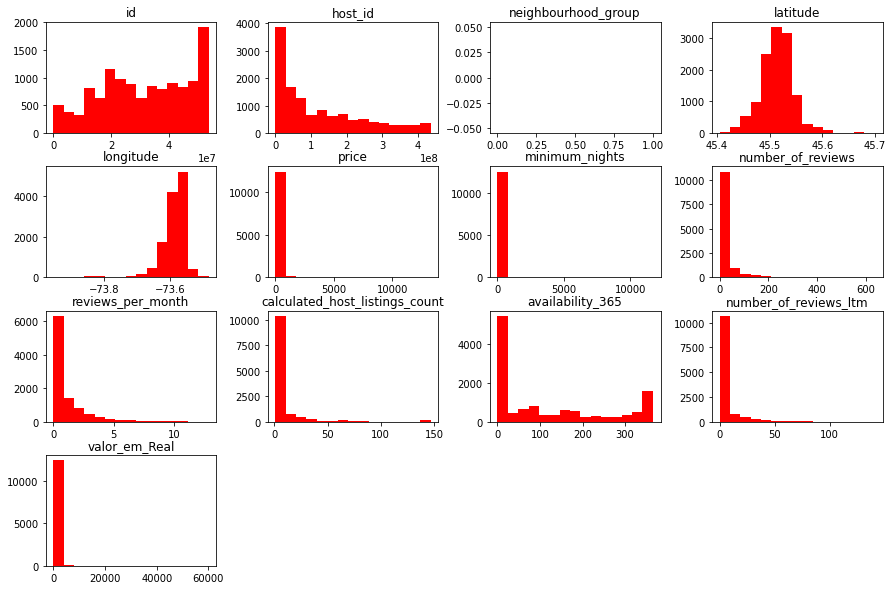

In [10]:
# plotando histogramas das variáveis numéricas

dfMontreal.hist(bins = 15, figsize=(15,10), color = 'red', grid = False);
plt.show()

Da observação dos histogramas acima, percebe - se que a distribuição da maioria das variáveis, sobretudo, *price*, *minimum_nights* e *valor_em_Real* está com assimetria possitiva, indicando a possibilidade da existência de valores além do comum (*outliers*). O valor da média (*mean*) deve estar bem acima da mediana.

Vamos olhar com mais atenção, especificamente, para as variáveis numéricas e observar alguns números estatísticos sobre o conjunto de dados.

In [11]:
# exibindo um resumo estatístico das variáveis numéricas selecionadas

dfMontreal[
           ['price','valor_em_Real', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
           ].describe()

,price,valor_em_Real,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,12570.000000,12570.000000,12570.000000,12570.000000,12570.000000,12570.000000
mean,125.713922,568.226928,15.961098,21.445346,8.658234,117.467303
std,284.779526,1287.203457,112.550860,46.300144,20.522849,133.192512
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,51.000000,230.520000,1.000000,1.000000,1.000000,0.000000
50%,83.000000,375.160000,2.000000,5.000000,1.000000,66.000000
75%,128.000000,578.560000,15.000000,20.000000,5.000000,224.000000
max,13294.000000,60088.880000,11684.000000,638.000000,147.000000,365.000000


Da observação da tabela acima, percebe - se que existem valores discrepantes em relação às colunas *price*, *valor_em_Real* e *minimum_nights*.

A diferença entre a média (mean) e a mediana (50%) das mesmas colunas, nos revela a presença de *outliers* e confirma a distribuição dos dados com assimetria positiva.

Veja, também, o maior(max) preço e a maior quantidade mínima de noites, como estão bem distantes da maioria. Observe que 75% dos valores é de até **R$ 578,56** e do número de noites é de **15** noites.

Desta forma, vamos analisar melhor essas colunas em busca desses valores discrepantes e verificar a possibilidade de eliminá-los da nossa análise. 

### **Primeiro, a coluna minimum _nights**

In [12]:
# descobrindo o limite superior, considerando o intervalo interquartil (Q3 - Q1)

iqr = dfMontreal.minimum_nights.quantile(0.75) - dfMontreal.minimum_nights.quantile(0.25)

limite_sup = dfMontreal.minimum_nights.quantile(0.75) + (1.5 * iqr)

print("O limite superior é:", limite_sup)

O limite superior é: 36.0


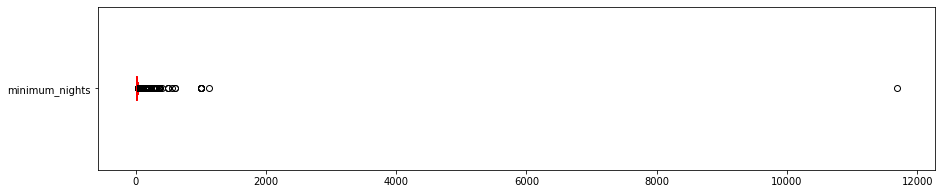

minimum_nights: valores acima de 36:
561 entradas
4.46%
minimum_nights: valores até 36:
12009 entradas
95.54%


In [13]:
# verificando outliers na coluna minimum_nights, considerado o limite superior igual a 36

dfMontreal.minimum_nights.plot(kind='box', vert=False,  figsize=(15,3), color = 'red')
plt.show()

print("minimum_nights: valores acima de 36:")
print("{} entradas".format(len(dfMontreal[dfMontreal.minimum_nights > 36])))
print("{:.2f}%".format((len(dfMontreal[dfMontreal.minimum_nights > 36]) / dfMontreal.shape[0])*100))

print("minimum_nights: valores até 36:")
print("{} entradas".format(len(dfMontreal[dfMontreal.minimum_nights <= 36])))
print("{:.2f}%".format((len(dfMontreal[dfMontreal.minimum_nights <= 36]) / dfMontreal.shape[0])*100))

Perceba que existem 561 registros com valores acima de 36 noites que não representam 5% de todo nosso dataset. 

### **Em seguida, a coluna valor_em_Real**

In [14]:
# verificando outliers na coluna valor_em_Real, considerado o limite superior igual a 1.100,62 (Q3 - Q1)

iqrValor = dfMontreal.valor_em_Real.quantile(0.75) - dfMontreal.valor_em_Real.quantile(0.25)

limite_sup_valor = dfMontreal.valor_em_Real.quantile(0.75) + (1.5 * iqrValor)

print("O limite superior é:",limite_sup_valor)

O limite superior é: 1100.62


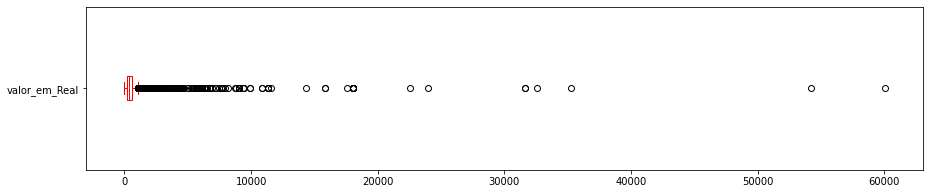

Valores em R$: acima de R$ 1.100,62
973 entradas
7.74%
Valores em R$: até R$ 1.100,62
11597 entradas
92.26%


In [15]:
# verificando outliers na coluna valor_em_Real, considerando o limite superioro igual 1.100,62.
dfMontreal['valor_em_Real'].plot(kind='box', vert=False, figsize=(15,3), color = 'red')
plt.show()

print('Valores em R$: acima de R$ 1.100,62')
print('{} entradas'.format(len(dfMontreal[dfMontreal['valor_em_Real']> 1100])))
print('{:.2f}%'.format((len(dfMontreal[dfMontreal['valor_em_Real']> 1100]) / dfMontreal.shape[0])*100))

print('Valores em R$: até R$ 1.100,62')
print('{} entradas'.format(len(dfMontreal[dfMontreal['valor_em_Real'] <= 1100])))
print('{:.2f}%'.format((len(dfMontreal[dfMontreal['valor_em_Real'] <= 1100]) / dfMontreal.shape[0])*100))

Há 973 valores acima de R$ 1.100,62. Esses valores serão excluidos. Eles represetam um pouco menos de 8,0% do nosso dataset, mas estão alterando a percepção dos dados.

## **Promovendo a limpeza necessária** 

Para uma melhor análise, precisamos fazer uma faxina no nosso dataset e obtermos melhores observações.

Vamos remover as colunas com valores ausentes, nulos ou irrelevantes, além de retirar os outliers, que identificamos nas análises anteriores.

Os valores iguais a 0(zero) e acima de *1.100,62 reais* serão apagados da coluna **valor_em_Real** e da coluna **minimum_nights**, iremos desconsiderar as entradas acima de 36 noites.

As colunas **neighbourhood_group, license, reviews_per_month,last_review** serão excluidas, pois não possuem dados relevantes para nosso trabalho.

Por fim, veremos os novos histogramas com as novas distribuições, pós faxina.

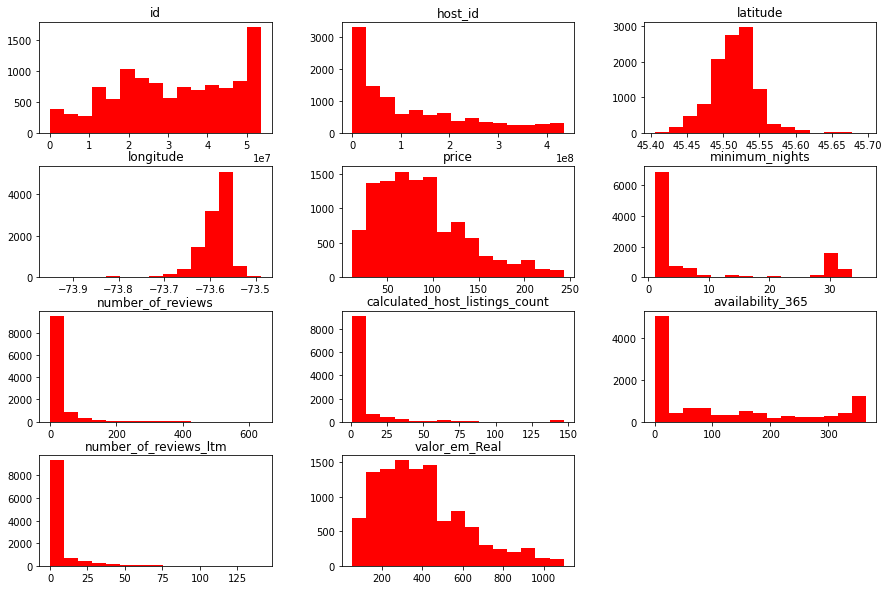

In [16]:
#Criando um novo dataset, após processarmos a faxina

dfMontrealLimpo = dfMontreal.copy()

# Retirando os Outliers
dfMontrealLimpo.drop(dfMontrealLimpo[dfMontrealLimpo['valor_em_Real'] > 1100].index, axis=0, inplace=True)
dfMontrealLimpo.drop(dfMontrealLimpo[dfMontrealLimpo.minimum_nights > 36].index, axis=0, inplace=True)

# excluindo as colunas com dados ausentes, nulos ou irrelevantes

dfMontrealLimpo.drop(columns = ['neighbourhood_group', 'license', 'reviews_per_month', 'last_review'], axis=1, inplace=True) 
dfMontrealLimpo.drop(dfMontrealLimpo[dfMontrealLimpo['valor_em_Real'] == 0].index, axis=0, inplace=True)
dfMontrealLimpo.drop(dfMontrealLimpo[dfMontrealLimpo.minimum_nights == 0].index, axis=0, inplace=True)

# Exibindo uma nova distribuição

dfMontrealLimpo.hist(bins = 15, figsize=(15,10), color = 'red', grid = False)

plt.show()

Veja como os dados estão melhor distribuidos, sobretudo no **histograma - valor_em_Real**. Note que a maioria dos preços está concentrada entre 100 reais e 500 reais.

E no **histograma - minimum_nights**, veja que o número mínimo de noites está concentrado entre 1 e 9 noites.

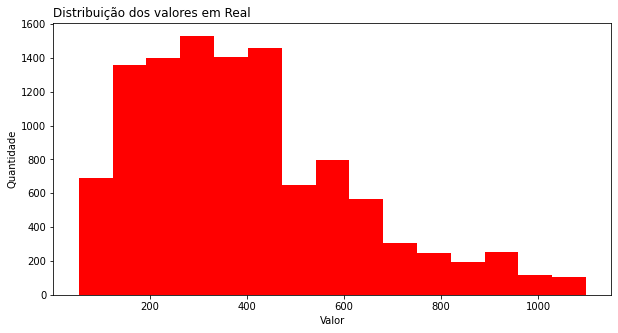

In [26]:
# exibindo a distribuição dos valore em Real, isoladamente

dfMontrealLimpo.valor_em_Real.hist(bins = 15,figsize=(10,5),color = 'red', grid = False)
plt.title('Distribuição dos valores em Real', loc = 'left')
plt.xlabel('Valor')
plt.ylabel('Quantidade')
plt.show()

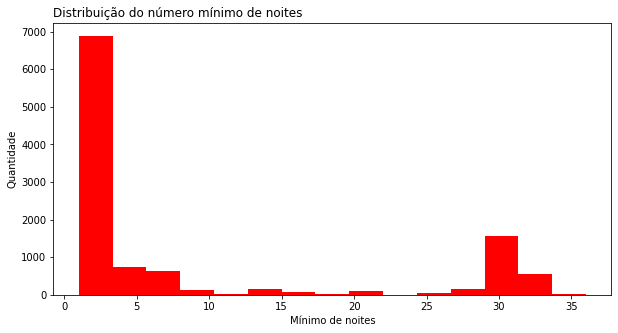

In [25]:
# exibindo a distribuição do número mínimo de noite, isoladamente

dfMontrealLimpo.minimum_nights.hist(bins = 15,figsize=(10,5),color = 'red', grid = False)
plt.title('Distribuição do número mínimo de noites', loc = 'left')
plt.xlabel('Mínimo de noites')
plt.ylabel('Quantidade')
plt.show()

In [27]:
# exibindo um resumo estatístico das variáveis numéricas selecionadas, após a limpeza do dataset

dfMontrealLimpo[
                  ['price','valor_em_Real', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
                ].describe()

,price,valor_em_Real,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,11074.000000,11074.000000,11074.000000,11074.000000,11074.000000,11074.000000
mean,87.673289,396.283265,8.809283,21.962254,8.928391,109.657938
std,48.736815,220.290405,11.654681,47.323694,21.382723,130.478385
min,12.000000,54.240000,1.000000,0.000000,1.000000,0.000000
25%,50.000000,226.000000,1.000000,1.000000,1.000000,0.000000
50%,80.000000,361.600000,2.000000,5.000000,1.000000,52.000000
75%,115.000000,519.800000,10.000000,21.000000,5.000000,196.000000
max,243.000000,1098.360000,36.000000,638.000000,147.000000,365.000000


### **Q4. Qual a média dos preços de aluguel?**

In [28]:
# ver a média da coluna price e valor_em_Real

print("Média em Dolar Canadense:\t CAD$ {:.2f}".format(dfMontrealLimpo.price.mean()))
print("Média em Real:\t R$ {:.2f}".format(dfMontrealLimpo['valor_em_Real'].mean()))

Média em Dolar Canadense:	 CAD$ 87.67
Média em Real:	 R$ 396.28


### **Q4. Qual a correlação existente entre as variáveis**

A correlação busca medir a força da relação entre duas variáveis. Quanto mais o coeficiente de correlação se aproximar de 1.0, maior é a correlação entre elas.

Vamor observar a matriz de correlação e seu heatmap, abaixo: 

In [29]:
# criando uma matriz de correlação

MtrCorr = dfMontrealLimpo[['price', 'valor_em_Real', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrando a matriz de correlação
display(MtrCorr)


,price,valor_em_Real,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,1.000000,-0.038679,0.097529,0.064927,0.135152
valor_em_Real,1.000000,1.000000,-0.038679,0.097529,0.064927,0.135152
minimum_nights,-0.038679,-0.038679,1.000000,-0.045848,0.225767,0.176883
number_of_reviews,0.097529,0.097529,-0.045848,1.000000,-0.046710,0.096118
calculated_host_listings_count,0.064927,0.064927,0.225767,-0.046710,1.000000,0.136619
availability_365,0.135152,0.135152,0.176883,0.096118,0.136619,1.000000


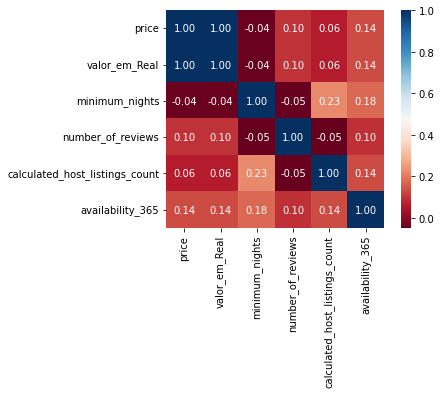

In [ ]:
# exibindo um heatmap a partir das correlações
sns.heatmap(MtrCorr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável *`room_type`* indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos ou casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método *`value_counts()`*.

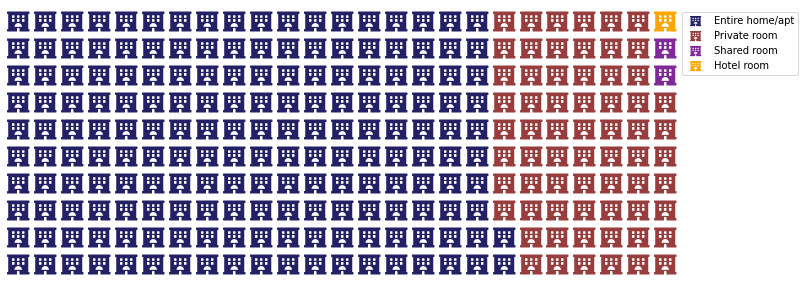

Entire home/apt    8049
Private room       2885
Shared room         101
Hotel room           39
Name: room_type, dtype: int64


In [30]:
# exibindo as quantidades de cada tipo de imóvel

roomTp = dict(dfMontrealLimpo.room_type.value_counts())

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=25,
    figsize=(12,10),
    colors=("#232066", "#983D3D", "#802999", "#FFA500"),            
    values = roomTp, icons="hotel", icon_size=20,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    icon_legend=True
)

fig.set_tight_layout(False)
plt.show();
print(dfMontrealLimpo.room_type.value_counts())

Dos 04  tipos de acomodação disponíveis , o preferido é o aluguel de casa ou apartamento todo. Mais de 70% dos inquilinos optam por esse tipo de acomodação. Enquanto que, pouco mais de 26% optam por alugar um quarto privado. Os demais juntos não somam 2%.

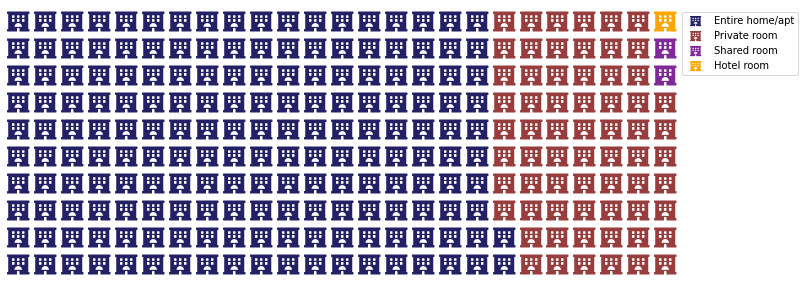

Entire home/apt    72.683764
Private room       26.052014
Shared room         0.912046
Hotel room          0.352176
Name: room_type, dtype: float64


In [31]:
# exibindo os percentuais de cada tipo de imóvel

roomTp = dict(dfMontrealLimpo.room_type.value_counts()/dfMontrealLimpo.shape[0]*100)

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=25,
    figsize=(12,10),
    colors=("#232066", "#983D3D", "#802999", "#FFA500"),
    values = roomTp, icons="hotel", icon_size=20,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    icon_legend=True
)

fig.set_tight_layout(False)
plt.show();
print(dfMontrealLimpo.room_type.value_counts()/dfMontrealLimpo.shape[0]*100)

### **Q6. Qual a localidade mais cara do dataset?**



As médias dos valores de aluguel dos 10 bairros mais caros variam de 414 a 629 reais, conforme segue abaixo.

In [32]:
# verificando a média dos preços em Real, agrupados por bairros
dfMontrealLimpo.groupby("neighbourhood")['valor_em_Real'].mean().sort_values(ascending=False)[:10]

neighbourhood
Kirkland               628.925714
Côte-Saint-Luc         483.640000
Dorval                 483.050435
Westmount              469.725490
Pointe-Claire          469.247368
Pierrefonds-Roxboro    448.771429
Ville-Marie            440.427216
Dollard-des-Ormeaux    417.179259
Mont-Royal             415.028718
Hampstead              414.333333
Name: valor_em_Real, dtype: float64

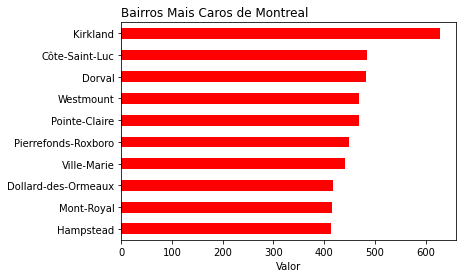

neighbourhood
Kirkland                                    628.925714
Côte-Saint-Luc                              483.640000
Dorval                                      483.050435
Westmount                                   469.725490
Pointe-Claire                               469.247368
Pierrefonds-Roxboro                         448.771429
Ville-Marie                                 440.427216
Dollard-des-Ormeaux                         417.179259
Mont-Royal                                  415.028718
Hampstead                                   414.333333
Le Sud-Ouest                                409.611004
Outremont                                   403.060727
Saint-Léonard                               400.200800
Le Plateau-Mont-Royal                       399.961502
Saint-Laurent                               399.674722
L'Île-Bizard-Sainte-Geneviève               396.253333
Lachine                                     371.664533
LaSalle                                     368.491

In [33]:
# gráfico das maiores médias dos preços, agrupadas por bairros

dfMontrealLimpo.groupby("neighbourhood")['valor_em_Real'].mean().sort_values(ascending=True)[-10:].plot(kind='barh', color = 'red')
plt.title('Bairros Mais Caros de Montreal', loc='left')
plt.xlabel('Valor')
plt.ylabel('')                                
plt.show()

print(dfMontrealLimpo.groupby("neighbourhood")['valor_em_Real'].mean().sort_values(ascending=False))

Os 05 bairros com os maiores valores médios somam pouco mais de 120 alugueis

Enquanto que o bairro queridinho, com mais de 3.000 alugueis, tem o 7º valor médio, R$ 440,43.

Observando a frequencia de alugueis por bairro, percebe-se que dos 5 bairros com maiores frequencias de alugueis, apenas o *Ville-Marie*, está entre os bairros mais caros.

É curioso que o bairro com a maior média dos valores de aluguel, *Kirkland*, não totaliza 10 alugueis.

Os 02 bairros mais queridinhos, *Ville-Marie e Le Plateau-Mont-Royal*, são repletos de belas atrações turisticas, como por exemplo a Basílica Notre-Dame de Montreal e um lindo mirante com uma maravilhosa vista da cidade.

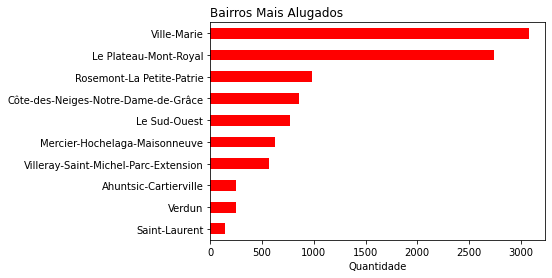

In [37]:
# gráfico da quantidade de alugueis, agrupadas por bairros

top10 = dfMontrealLimpo.neighbourhood.value_counts().sort_values()[-10:]
top10.plot(kind = 'barh', color = 'red')
plt.title('Bairros Mais Alugados', loc='left')
plt.xlabel('Quantidade')
plt.ylabel('')
plt.show()

In [38]:
# exibindo os bairros com as frequencias de aluguel.
dfMontrealLimpo.neighbourhood.value_counts()

Ville-Marie                                 3082
Le Plateau-Mont-Royal                       2743
Rosemont-La Petite-Patrie                    987
Côte-des-Neiges-Notre-Dame-de-Grâce          854
Le Sud-Ouest                                 767
Mercier-Hochelaga-Maisonneuve                622
Villeray-Saint-Michel-Parc-Extension         570
Ahuntsic-Cartierville                        250
Verdun                                       245
Saint-Laurent                                144
Outremont                                    110
LaSalle                                      101
Lachine                                       75
Montréal-Nord                                 58
Rivière-des-Prairies-Pointe-aux-Trembles      57
Westmount                                     51
Saint-Léonard                                 50
Côte-Saint-Luc                                43
Pierrefonds-Roxboro                           42
Anjou                                         42
Mont-Royal          

A seguir, as médias dos valores de aluguel dos 10 bairros mais **baratos**.

Nota-se que os valores variam de 91 a 356 reais e, ainda assim, os bairros mais baratos são pouco alugados.

Parece que os valores mais baixos não são atraentes suficientes para conquistar os hóspedes. No caso, o bairro mais barato (*Saint-Anne-de -Bellevue*), com apenas 03 aluguel, fica no subúrbio no Sul da ilha de Montreal e o segundo, *Montréal-Nord*, com 58 alugueis, é um bairro administrativo, no lado norte da ilha. Ambos distantes das maiores atrações.

In [39]:
# exibindo os bairros com as menores médias de preço de aluguel

dfMontrealLimpo.groupby('neighbourhood')['valor_em_Real'].mean().sort_values(ascending=True)[:10]

neighbourhood
Sainte-Anne-de-Bellevue                      91.906667
Montréal-Nord                               293.955862
Montréal-Ouest                              302.194286
Villeray-Saint-Michel-Parc-Extension        328.469193
Ahuntsic-Cartierville                       342.001280
Anjou                                       344.273333
Baie-d'Urfé                                 349.546667
Mercier-Hochelaga-Maisonneuve               350.002058
Côte-des-Neiges-Notre-Dame-de-Grâce         351.369133
Rivière-des-Prairies-Pointe-aux-Trembles    355.969825
Name: valor_em_Real, dtype: float64

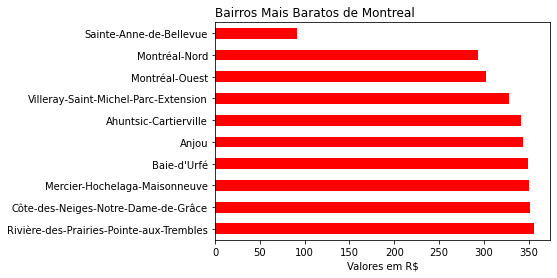

neighbourhood
Sainte-Anne-de-Bellevue                      91.906667
Montréal-Nord                               293.955862
Montréal-Ouest                              302.194286
Villeray-Saint-Michel-Parc-Extension        328.469193
Ahuntsic-Cartierville                       342.001280
Anjou                                       344.273333
Baie-d'Urfé                                 349.546667
Mercier-Hochelaga-Maisonneuve               350.002058
Côte-des-Neiges-Notre-Dame-de-Grâce         351.369133
Rivière-des-Prairies-Pointe-aux-Trembles    355.969825
Name: valor_em_Real, dtype: float64


In [40]:
# gráfico das menores média dos preços, agrupadas por bairros

dfMontrealLimpo.groupby('neighbourhood')['valor_em_Real'].mean().sort_values(ascending=False)[-10:].plot(kind = 'barh', color = 'red')

plt.title('Bairros Mais Baratos de Montreal', loc='left')
plt.ylabel("")
plt.xlabel('Valores em R$')
plt.show()

print(dfMontrealLimpo.groupby('neighbourhood')['valor_em_Real'].mean().sort_values(ascending=True)[:10])

In [ ]:
# BAIRROS - Valores (R$)
# Mais caros, mais alugados: Ville-Marie(440), Le Sud-Ouest(409)
# Mais baratos, mais alugados: Côte-des-Neiges-Notre-Dame-de-Grâce(351), Villeray-Saint-Michel-Parc-Extension(328), 
# Ahuntsic-Cartierville(342) e Montréal-Nord(293), 

# Os 03 bairros mais queridos: 1 - Ville-Marie(440), 2 - Le Plateau-Mont-Royal(399) e 3 - Rosemont-La Petite-Patrie(366)

Vamos fazer uma análise mais detalhada sobre o bairro campeão de hospedagens e descobrir o que ele tem de tão atrativo que justifique ter mais de 27% de todas as hospedagens constantes no nosso dataset.

Veja que no bairro mais querido, 50 % dos alugueis custa menos que 403 reais. E 75% dos valores, custa até 570 reais.

O que há de tão especial nesse bairro, que o coloca na preferência dos viajantes.
Vamos vê o que ainda podemos descobrir sobre ele.

In [41]:
# resumo estatístico dos dados do bairro Ville-Marie
dfMontrealLimpo[dfMontrealLimpo['neighbourhood'] == 'Ville-Marie']['valor_em_Real'].describe()

count    3082.000000
mean      440.427216
std       216.178720
min        58.760000
25%       289.280000
50%       402.280000
75%       565.000000
max      1093.840000
Name: valor_em_Real, dtype: float64

In [42]:
# plotar os imóveis pela latitude-longitude
px.density_mapbox(dfMontrealLimpo,
                  z = 'valor_em_Real',
                  lat = 'latitude', 
                  lon = 'longitude', 
                  radius = 1, 
                  zoom = 12,
                  width = 1000,
                  height = 500, 
                  mapbox_style = 'open-street-map')


## Conclusões


Por fim, após o mergulho nos dados, percebi o quanto foi possível conhecer mais e melhor sobre a cidade de Montreal e, acredito ter sido um ótimo exercício de extração de valor dos dados para auxiliar no planejamento de uma futura viagem.

**C'est ça et à la prochaine!!**